In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

sc.logging.print_header()

scanpy==1.9.1 anndata==0.7.6 umap==0.5.1 numpy==1.22.4 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.11 pynndescent==0.5.2


In [2]:
adata = sc.read_h5ad('raw/GSE161918_RNA.h5ad')
adata

AnnData object with n_obs × n_vars = 411902 × 32738
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of

In [3]:
print(np.min(adata.X))
print(np.max(adata.X))

0.0
9.096446


In [4]:
# swap out the .X
adata.X = adata.layers['counts'].copy()
print(np.min(adata.X))
print(np.max(adata.X))

0.0
8475.0


In [5]:
adt = sc.read_h5ad('raw/GSE161918_CITE.h5ad')
adt

AnnData object with n_obs × n_vars = 411902 × 192
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [6]:
print(np.min(adt.X))
print(np.max(adt.X))

-6.182546
60.086304


In [7]:
adt.X = adt.layers['counts'].copy()
print(np.min(adt.X))
print(np.max(adt.X))

0.0
12590.0


In [8]:
# read in the CITE reference
cite_ref = pd.read_csv('Liu_cite_features_matched.txt', sep = '\t', index_col = 0)
cite_ref

,DNA_ID,Clone,Description,Barcode,RRID (Biolegend Catalogue Number),Isotype
feature_id,,,,,,
CD80,C0005,2D10,0005 anti-human CD80,ACGAATCAATCTGTG,AB_2800783 (BioLegend Cat. No. 305243),"Mouse IgG1, kappa"
CD86,C0006,IT2.2,0006 anti-human CD86,GTCTTTGTCAGTGCA,AB_2800786 (BioLegend Cat. No. 305447),"Mouse IgG2b, kappa"
CD274,C0007,29E.2A3,"0007 anti-human CD274 (B7-H1, PD-L1)",GTTGTCCGACAATAC,AB_2800860 (BioLegend Cat. No. 329751),"Mouse IgG2b, kappa"
CD273,C0008,24F.10C12,"0008 anti-human CD273 (B7-DC, PD-L2)",TCAACGCTTGGCTAG,AB_2800858 (BioLegend Cat. No. 329621),"Mouse IgG2a, kappa"
CD275,C0009,2D3,"0009 anti-human CD275 (B7-H2, ICOSL)",GTGCATTCAACAGTA,NaN,"Mouse IgG2b, kappa"
...,...,...,...,...,...,...
Podocalyxin,C1051,mAb 84,1051 anti-human Podocalyxin,GAGCCGGTATAATGC,AB_2832734 (BioLegend Cat. No. 374305),"Mouse IgM, kappa"
CD224,C1052,KF29,1052 anti-human CD224,CTGATGAGATGTCAG,AB_2820039 (BioLegend Cat. No. 394307),"Mouse IgG1, kappa"
c-Met,C1055,12.1,1055 anti-c-Met,GCTGCTGCGATTTGA,NaN,"Mouse IgG1, kappa"


In [9]:
for f in cite_ref:
    adt.var[f] = pd.Series(cite_ref[f])

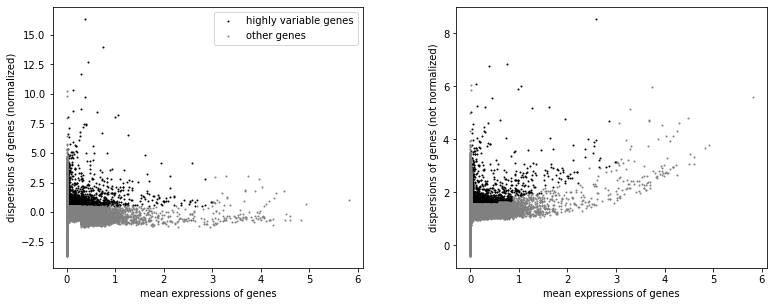

In [10]:
# create a simple preocessed graph and umap based on GEX
adata.var['mt'] = adata.var_names.str.startswith('MT-')
# create qc metrics
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
# normalise
sc.pp.normalize_total(adata, target_sum=1e4)
# log transform
sc.pp.log1p(adata)
# find hvg
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

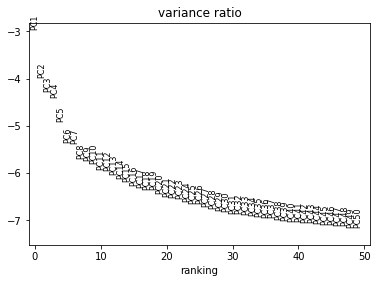

In [12]:
# fix in raw
adata.raw = adata
# subset to hvg
adata = adata[:, adata.var.highly_variable].copy()
# regress
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
# scale
sc.pp.scale(adata, max_value=10)
# pca
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [13]:
# neighbors
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
# umap
sc.tl.umap(adata, min_dist = 0.3)
# clusters
sc.tl.leiden(adata)

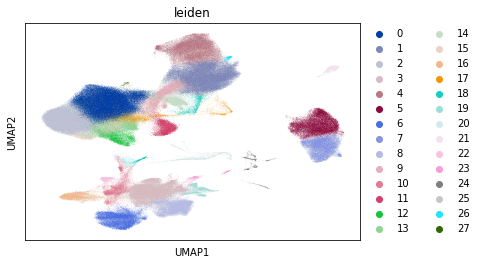

In [14]:
sc.pl.umap(adata, color = 'leiden')

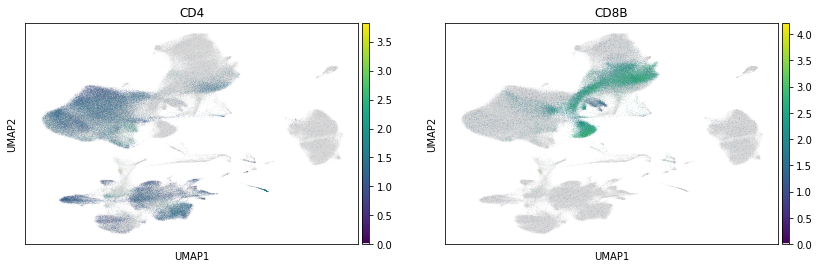

In [15]:
import tools
sc.pl.umap(adata, color = ['CD4', 'CD8B'], color_map = tools.cmp())

In [16]:
# save this 
adata.write_h5ad('raw/GSE161918_RNA_prepped.h5ad', compression = 'gzip')

In [17]:
adt.obs = adata.obs.copy()
adt.obsm = adata.obsm.copy()
adt.obsp = adata.obsp.copy()

In [18]:
adt2 = adt.copy()
# normalise
sc.pp.normalize_total(adt2, target_sum=1e4)
# log transform
sc.pp.log1p(adt2)

... storing 'RRID (Biolegend Catalogue Number)' as categorical
... storing 'Isotype' as categorical


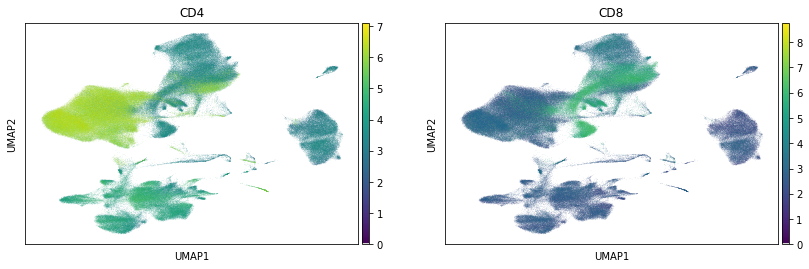

In [19]:
sc.pl.umap(adt2, color = ['CD4', 'CD8'], color_map = tools.cmp())

In [20]:
# https://muon.readthedocs.io/en/latest/omics/citeseq.html#clr
from muon import prot as pt

In [26]:
# split the adt into groups based on the isotype control
controls1 = [
    '0090 Mouse IgG1, κ isotype Ctrl',
    '0091 Mouse IgG2a, κ isotype Ctrl',
    '0092 Mouse IgG2b, κ isotype Ctrl',
    '0095 Rat IgG2b, κ Isotype Ctrl']
controls2 = list(cite_ref[cite_ref.Description.isin(controls1)].Isotype)
cite_ref[cite_ref.Description.isin(controls1)]

,DNA_ID,Clone,Description,Barcode,RRID (Biolegend Catalogue Number),Isotype
feature_id,,,,,,
IgG1Kiso,C0090,MOPC-21,"0090 Mouse IgG1, κ isotype Ctrl",GCCGGACGACATTAA,NaN,"Mouse IgG1, kappa"
IgG2aKiso,C0091,MOPC-173,"0091 Mouse IgG2a, κ isotype Ctrl",CTCCTACCTAAACTG,NaN,"Mouse IgG2a, kappa"
IgG2bKiso,C0092,MPC-11,"0092 Mouse IgG2b, κ isotype Ctrl",ATATGTATCACGCGA,NaN,"Mouse IgG2b, kappa"
ratIgG2bKiso,C0095,RTK4530,"0095 Rat IgG2b, κ Isotype Ctrl",GATTCTTGACGACCT,NaN,"Rat IgG2b, kappa"


In [27]:
adt.var['control'] = adt.var['Isotype']
adt.var['control'] = adt.var['control'].astype(str)
for i in adt.var.index:
    if not adt.var.at[i, 'Isotype'] in controls2:
        adt.var.at[i, 'control'] = 'other'
    elif adt.var.at[i, 'Description'] in controls1:
        adt.var.at[i, 'control'] = 'isotype'
    else:
        adt.var.at[i, 'control'] = 'target'

In [28]:
# subset to only those with isotype
adt = adt[:, adt.var.control.isin(['target', 'isotype'])].copy()
adt

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [29]:
iso_dict = {'Mouse IgG1, kappa':'IgG1Kiso',
            'Mouse IgG2a, kappa':'IgG2aKiso',
            'Mouse IgG2b, kappa':'IgG2bKiso',
            'Rat IgG2b, kappa':'ratIgG2bKiso'
           }

In [30]:
adt.var['isotype'] = [iso_dict[x] for x in adt.var['Isotype']]
adt.var

,name,DNA_ID,Clone,Description,Barcode,RRID (Biolegend Catalogue Number),Isotype,control,isotype
CD80,CD80,C0005,2D10,0005 anti-human CD80,ACGAATCAATCTGTG,AB_2800783 (BioLegend Cat. No. 305243),"Mouse IgG1, kappa",target,IgG1Kiso
CD86,CD86,C0006,IT2.2,0006 anti-human CD86,GTCTTTGTCAGTGCA,AB_2800786 (BioLegend Cat. No. 305447),"Mouse IgG2b, kappa",target,IgG2bKiso
CD274,CD274,C0007,29E.2A3,"0007 anti-human CD274 (B7-H1, PD-L1)",GTTGTCCGACAATAC,AB_2800860 (BioLegend Cat. No. 329751),"Mouse IgG2b, kappa",target,IgG2bKiso
CD273,CD273,C0008,24F.10C12,"0008 anti-human CD273 (B7-DC, PD-L2)",TCAACGCTTGGCTAG,AB_2800858 (BioLegend Cat. No. 329621),"Mouse IgG2a, kappa",target,IgG2aKiso
CD275,CD275,C0009,2D3,"0009 anti-human CD275 (B7-H2, ICOSL)",GTGCATTCAACAGTA,NaN,"Mouse IgG2b, kappa",target,IgG2bKiso
...,...,...,...,...,...,...,...,...,...
NLRP2,NLRP2,C1048,8F10B51,1048 anti-human NLRP2,ACGCTTGTGTTAGTT,NaN,"Mouse IgG1, kappa",target,IgG1Kiso
CD224,CD224,C1052,KF29,1052 anti-human CD224,CTGATGAGATGTCAG,AB_2820039 (BioLegend Cat. No. 394307),"Mouse IgG1, kappa",target,IgG1Kiso
c-Met,c-Met,C1055,12.1,1055 anti-c-Met,GCTGCTGCGATTTGA,NaN,"Mouse IgG1, kappa",target,IgG1Kiso
CD258,CD258,C1056,T5-39,1056 anti-human CD258 (LIGHT),ACTTCCCTGTAGAAA,AB_2832625 (BioLegend Cat. No. 318711),"Mouse IgG2b, kappa",target,IgG2bKiso


In [31]:
pt.pp.clr(adt)

... storing 'control' as categorical
... storing 'isotype' as categorical


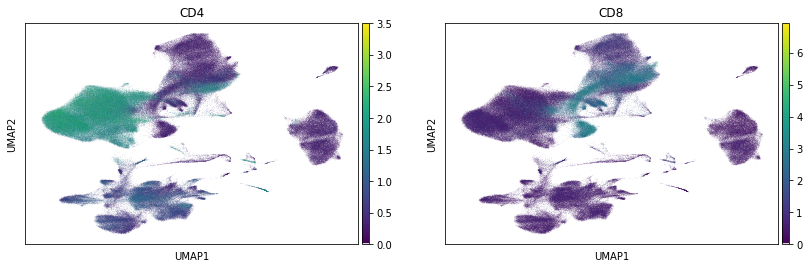

In [32]:
sc.pl.umap(adt, color = ['CD4', 'CD8'], color_map = tools.cmp())

In [33]:
adt.write_h5ad('raw/GSE161918_CITE_prepped.h5ad', compression = 'gzip')

In [34]:
import scanpy as sc
import pandas as pd
import numpy as np

sc.logging.print_header()

scanpy==1.9.1 anndata==0.7.6 umap==0.5.1 numpy==1.22.4 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.11 pynndescent==0.5.2


In [35]:
adata = sc.read_h5ad('raw/GSE161918_RNA_prepped.h5ad')
adata

AnnData object with n_obs × n_vars = 411902 × 1961
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_

In [36]:
adt = sc.read_h5ad('raw/GSE161918_CITE_prepped.h5ad')
adt

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [37]:
# # let's just subset to a sample to make things faster
# adata.obs['sample_id'].value_counts()

In [38]:
# adata = adata[adata.obs['sample_id'] == 'B2_HGR0000124_T0']
# adt = adt[adt.obs['sample_id'] == 'B2_HGR0000124_T0']

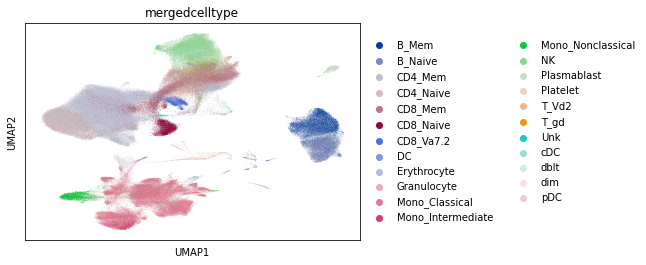

In [39]:
# ok let's simulate what happens if we just look at CD4T vs CD8T
sc.pl.umap(adt, color = 'mergedcelltype')

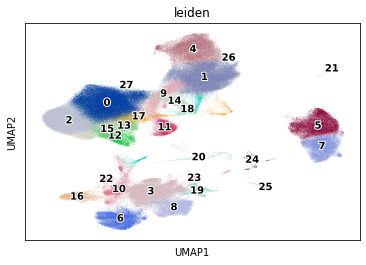

In [40]:
sc.pl.umap(adt, color = 'leiden', legend_loc = 'on data', legend_fontoutline = 2)

In [42]:
from tqdm import tqdm
# create over cluster in each cluster:
sc.tl.leiden(adata, restrict_to = ('leiden', ['0']), key_added = 'leiden_R')
for i in tqdm(range(1, len(adata.obs.leiden.unique()))):
    sc.tl.leiden(adata, restrict_to = ('leiden_R', [str(i)]), key_added = 'leiden_R')

100%|██████████| 27/27 [01:18<00:00,  2.91s/it]


In [43]:
adt.obs = adata.obs.copy()
adt.obsm = adata.obsm.copy()
adt.obsp = adata.obsp.copy()

In [155]:
# let's create a new object but this time the protein data are in a pandas dataframe
tmpx = adt.to_df()
tmpx['leiden_R'] = adt.obs['leiden_R']
tmpx

,CD80,CD86,CD274,CD273,CD275,CD11b,CD137L,CD70,CD40,CD3,...,CD82,CD101,CD88,HLA-F,NLRP2,CD224,c-Met,CD258,DR3,leiden_R
AAACCTGAGAAACCTA-1_1,0.446872,0.000000,1.758452,1.137467,0.970776,0.943174,0.920461,0.834757,1.712393,0.344494,...,0.675262,1.925854,2.443104,0.790311,0.965836,1.194599,0.967390,1.087008,0.614541,"16,12"
AAACCTGAGACGACGT-1_1,0.946843,0.409131,0.955954,0.834609,1.050353,0.715600,0.562596,0.776490,1.828339,0.401143,...,1.532240,0.614268,0.557792,0.393144,0.885258,0.190037,0.853310,0.837360,0.746678,"7,2"
AAACCTGAGCTAGTTC-1_1,0.902142,0.698641,0.636327,1.027073,1.050353,0.887369,1.060585,0.791378,2.757613,0.284443,...,0.785818,0.732204,0.427511,0.894003,1.142762,0.579335,0.993987,1.087008,0.746678,"7,5"
AAACCTGAGGGTTTCT-1_1,0.855348,1.260603,0.726308,0.596056,0.738756,2.555898,0.800762,0.559585,1.252253,0.505637,...,0.885359,1.699804,1.369632,0.543747,0.885258,1.094702,0.615722,0.994487,0.541290,"8,4"
AAACCTGCACCTGGTG-1_1,0.642623,0.698641,0.808856,0.596056,0.789667,1.394188,0.992975,0.903118,1.252253,0.600238,...,0.866228,0.803747,0.587873,1.100877,1.022276,0.454610,1.267786,0.716965,0.916985,"4,8"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTACTCTCC-16_4,0.642623,1.512611,0.808856,0.596056,1.346164,2.339291,0.614984,0.665562,0.204662,0.220553,...,0.524114,1.074307,1.396391,1.202338,0.537548,0.902215,0.449373,0.503879,0.541290,"19,3"
TTTGTCAGTATAGTAG-16_4,0.700195,1.512611,0.537441,0.398083,0.738756,1.546241,0.920461,0.648661,0.646287,0.284443,...,0.439009,0.933097,0.726037,0.753211,0.946292,1.112060,0.653319,0.232739,0.578586,"19,9"
TTTGTCATCTCGCATC-16_4,0.581534,1.955310,0.885107,1.236877,0.738756,1.735103,0.614984,0.631469,0.646287,0.284443,...,1.009916,2.081662,1.630703,0.957602,0.507397,1.022090,0.615722,0.837360,0.942750,"22,3"
TTTGTCATCTGCGTAA-16_4,0.291212,0.000000,0.636327,0.150994,0.568338,0.626568,0.757452,0.502063,0.374470,0.505637,...,0.345982,0.527132,0.355399,0.496022,0.797614,0.420836,0.493625,1.041817,0.682791,"4,0"


In [182]:
adt_raw = adt.copy()
adt_raw.X = adt_raw.layers['counts']
sc.pp.calculate_qc_metrics(adt_raw, percent_top=None, log1p=False, inplace=True)
adt.obs['total_counts'] = adt_raw.obs['total_counts']

In [150]:
import seaborn as sns
from sklearn import mixture
import matplotlib.pyplot as plt
from tqdm import tqdm

In [161]:
for clus in tqdm(list(set(tmpx['leiden_R']))):
    tmpx2 = tmpx[tmpx['leiden_R'] == clus]
    tmpx2 = tmpx2.melt(id_vars = 'leiden_R')
    for i in adt.var.index:
        iso = adt.var.at[i, 'isotype']
        if i != iso:
            tmpx3 = tmpx2[tmpx2.variable.isin([i, iso])].copy()
            gmm = mixture.GaussianMixture(n_components=2, max_iter=1000, covariance_type="full")
            X = np.array(tmpx3.value).reshape(-1, 1)
            clusters = gmm.fit(X).predict(X)
            tmpx3['cluster'] = clusters
            # select the cluster where it's mostly dominated by isotype (>75%?), and that cluster will be the background cluster
            df_cluster = pd.crosstab(tmpx3['cluster'], tmpx3['variable'])
            if df_cluster.shape[0] > 1:
                if abs([x for x in df_cluster[iso].diff() if pd.notnull(x)][0])/df_cluster[iso].sum() > 0.5:
                    bg_clus = df_cluster.nlargest(n=1, columns = iso).index[0]
                    clip = max(tmpx3[tmpx3.cluster == bg_clus].value)
                    tmpdf = pd.DataFrame(tmpx[tmpx['leiden_R'] == clus][i] <= clip)
                    tmplist = list(tmpdf[tmpdf[i]].index)
                else:
                    tmpdf = pd.DataFrame(tmpx[tmpx['leiden_R'] == clus][i])
                    tmplist = list(tmpdf.index)
            else:
                tmpdf = pd.DataFrame(tmpx[tmpx['leiden_R'] == clus][i])
                tmplist = list(tmpdf.index)
            # update to zero
            tmpx.loc[tmplist, i] = 0

 12%|█▏        | 43/345 [03:27<22:22,  4.45s/it]/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.8/site-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
100%|██████████| 345/345 [29:38<00:00,  5.15s/it]


In [168]:
from scipy.sparse import csr_matrix
X = csr_matrix(tmpx.drop('leiden_R', axis = 1).values)
X

<411902x180 sparse matrix of type '<class 'numpy.float64'>'
	with 18270131 stored elements in Compressed Sparse Row format>

In [169]:
adt.X

<411902x180 sparse matrix of type '<class 'numpy.float64'>'
	with 70074186 stored elements in Compressed Sparse Column format>

In [190]:
adt2 = adt.copy()
adt3 = adt.copy()

In [191]:
adt3.X = X.copy()
adt3

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

In [192]:
adt2

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

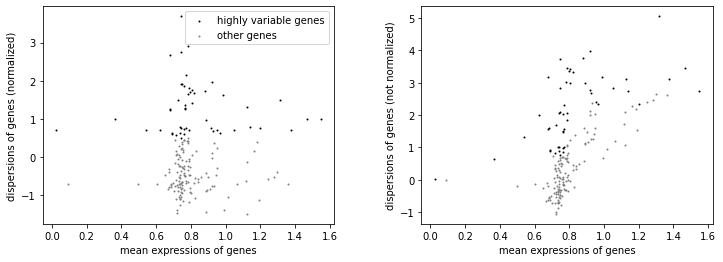

In [193]:
# find hvg
sc.pp.highly_variable_genes(adt2)
sc.pl.highly_variable_genes(adt2)

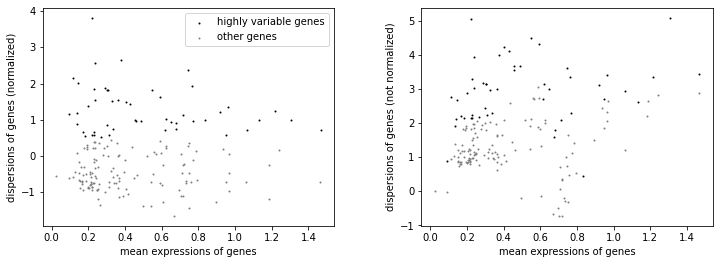

In [194]:
# find hvg
sc.pp.highly_variable_genes(adt3)
sc.pl.highly_variable_genes(adt3)

In [219]:
adt2 = adt2.raw.to_adata()
adt3 = adt3.raw.to_adata()
adt2.var.drop('highly_variable', axis = 1, inplace = True)
adt3.var.drop('highly_variable', axis = 1, inplace = True)

In [220]:
adt2.raw = adt2
adt3.raw = adt3

In [221]:
# subset to hvg
# adt2 = adt2[:, adt2.var.highly_variable].copy()
# regress
sc.pp.regress_out(adt2, ['total_counts'])
# scale
sc.pp.scale(adt2, max_value=10)

In [222]:
adt2

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

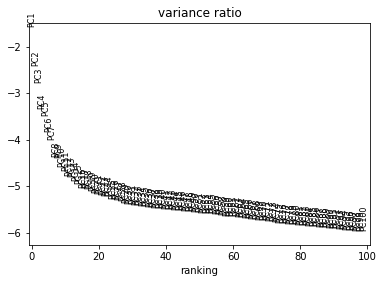

In [229]:
# pca
sc.tl.pca(adt2, svd_solver='arpack', n_comps = 100)
sc.pl.pca_variance_ratio(adt2, log=True, n_pcs = 100)

In [239]:
# neighbors
sc.pp.neighbors(adt2, n_neighbors=10, n_pcs=40)

In [240]:
# umap
sc.tl.umap(adt2, min_dist = 0.3)

In [241]:
# clusters
sc.tl.leiden(adt2)

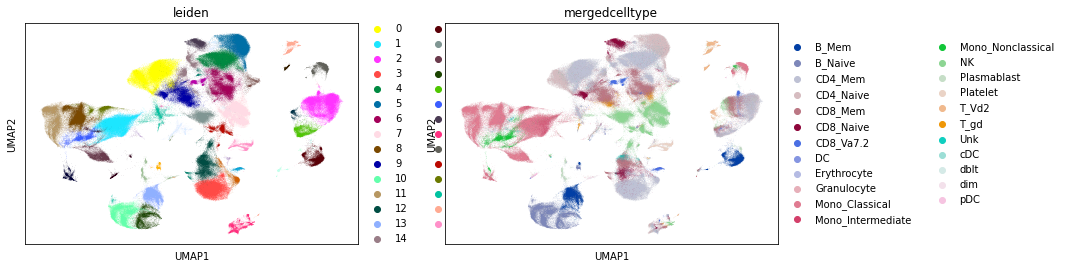

In [242]:
sc.pl.umap(adt2, color = ['leiden', 'mergedcelltype'])

In [232]:
# subset to hvg
# adt3 = adt3[:, adt3.var.highly_variable].copy()
# regress
sc.pp.regress_out(adt3, ['total_counts'])
# scale
sc.pp.scale(adt3, max_value=10)

In [233]:
adt3

AnnData object with n_obs × n_vars = 411902 × 180
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_CITE', 'nFeature_CITE', 'nCount_HTO', 'nFeature_HTO', 'Batch', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'INT_ID', 'BARCODE', 'NUM.SNPS', 'NUM.READS', 'BEST.GUESS', 'BEST.LLK', 'NEXT.GUESS', 'NEXT.LLK', 'DIFF.LLK.BEST.NEXT', 'BEST.POSTERIOR', 'SNG.BEST.GUESS', 'SNG.BEST.LLK', 'SNG.NEXT.GUESS', 'SNG.NEXT.LLK', 'SNG.ONLY.POSTERIOR', 'DBL.BEST.GUESS', 'DBL.BEST.LLK', 'DIFF.LLK.SNG.DBL', 'NewBarcode', 'percent.mito', 'autoHashcalls', 'ADTmclust1mean', 'Donor', 'Sample', 'adt_snn_res.0.5', 'seurat_clusters', 'BatchClusters', 'sample', 'BatchSort', 'Age', 'Subject', 'Gender', 'Ward', 'Status', 'Pool', 'Timepoint', 'Class', 'Sorted', 'sample_id', 'sample_name', 'symptom_type', 'hospital_days', 'day_from_symptom_onset_to_hospitalization', 'number_of_days_hospitalized', 'computed_ethnicity', 'ever_admitted_to_icu', 'severity', 'days_of_s

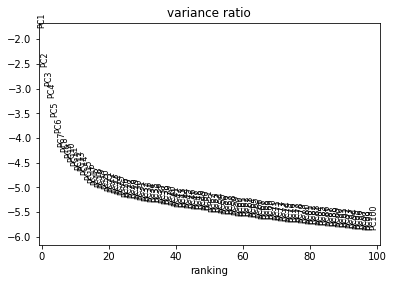

In [234]:
# pca
sc.tl.pca(adt3, svd_solver='arpack', n_comps = 100)
sc.pl.pca_variance_ratio(adt3, log=True, n_pcs = 100)

In [245]:
# neighbors
sc.pp.neighbors(adt3, n_neighbors=10, n_pcs=20)

In [246]:
# umap
sc.tl.umap(adt3, min_dist = 0.3)

In [247]:
# clusters
sc.tl.leiden(adt3)

In [248]:
adt3.uns.pop('leiden_colors')

['#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#808080',
 '#8

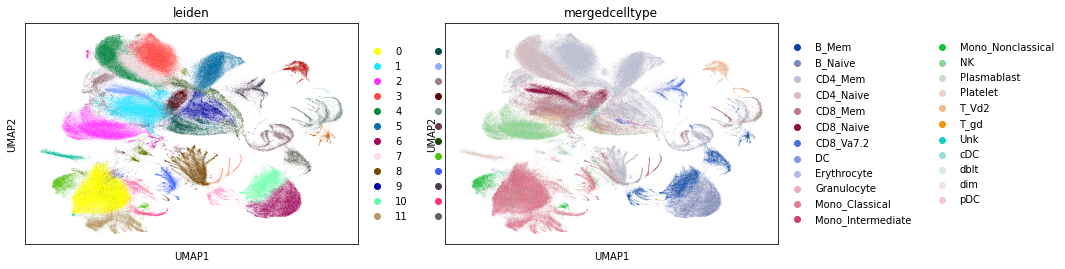

In [249]:
sc.pl.umap(adt3, color = ['leiden', 'mergedcelltype'])

In [243]:
adt2.write_h5ad('raw/GSE161918_CITE_prepped_clr_raw.h5ad', compression = 'gzip')

In [250]:
adt3.write_h5ad('raw/GSE161918_CITE_prepped_clr_bgsubtracted.h5ad', compression = 'gzip')